# KNN-邻近算法练习

第一步：导入包

In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris  #鸢尾花数据集
from sklearn.model_selection import train_test_split #划分数据集
from sklearn.preprocessing import StandardScaler   #标准化
from sklearn.neighbors import KNeighborsClassifier #k-近邻算法

第二步：加载数据

In [7]:
iris=load_iris()

第三步：选择特征值x与目标值y

In [8]:
x=iris.data
y=iris.target

第四步：数据集划分

In [17]:
#划分训练集与测试集
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
x_test.shape  #查看数组形状

(45, 4)

第五步:数据标准化

In [18]:
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test) #我们在训练集上拟合之后，已经计算出来了均值与方差，相当于已经有转化的规则，所以测试集不用再fit()

第六步：调用knn算法建立模型

In [19]:
knn=KNeighborsClassifier() #n_neighbors默认不写：k值为5
#拟合模型（训练模型）
knn.fit(x_train,y_train)

KNeighborsClassifier()

第七步：进行预测

In [20]:
y_predict=knn.predict(x_test)
y_predict,y_test

(array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
        0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
        0]),
 array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
        0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0,
        0]))

第八步：评估模型

In [21]:
knn.score(x_test,y_test) #准确率

0.9777777777777777

# 混淆矩阵

In [26]:
from sklearn.metrics import confusion_matrix #生产混淆矩阵
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns  #画图

In [28]:
#设置中文字体
matplotlib.rcParams['font.family']='SimHei'
matplotlib.rcParams['font.size']=10

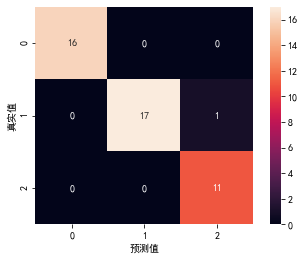

In [30]:
mat=confusion_matrix(y_test,y_predict) #生成混淆矩阵
sns.heatmap(mat,square=True,annot=True,cbar=True) #annot=True加载标签，cbar=False不显示颜色标记
plt.xlabel('预测值')
plt.ylabel('真实值')
plt.show()

# 精确率和召回率

In [31]:
from sklearn.metrics import classification_report #f1评分

In [33]:
print(classification_report(y_test,y_predict,target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      0.94      0.97        18
   virginica       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



# 交叉验证

二折交叉验证

In [34]:
knn1=KNeighborsClassifier()
knn1.fit(x_test,y_test)
knn1.score(x_train,y_train)

0.9523809523809523

五折交叉验证

In [35]:
from sklearn.model_selection import cross_val_score #交叉验证

In [36]:
cvs=cross_val_score(knn,x,y,cv=5)#cv=划分的份数（几折）
cvs

array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])

In [38]:
cvs.mean()

0.9733333333333334

# 调参：网格搜索

In [39]:
from sklearn.model_selection import GridSearchCV #网格搜索交叉验证

In [40]:
param={'n_neighbors':[1,2,3,4,6,7]}
gs=GridSearchCV(knn,param_grid=param,cv=10)
gs.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 6, 7]})

In [42]:
gs.best_estimator_

KNeighborsClassifier(n_neighbors=6)

In [44]:
gs.score(x_test,y_test)

0.9777777777777777